---
title: "Regular expressions & word tokenization"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-03-24"
categories: [python, datacamp, machine learning, nlp]
image: "regularExpressionWordTokenization.png"

---

# Regular expressions & word tokenization

There will be a discussion on some basic NLP concepts, such as word tokenization and regular expressions for parsing text. We will also cover how to handle non-English texts, as well as more difficult tokenization problems.

This **Regular expressions & word tokenization** is part of [Datacamp course: Introduction to Natural Language Processing in Python] You will learn the basics of natural language processing (NLP), such as how to identify and separate words, how to extract topics from a text, and how to construct your own fake news classifier. As part of this course, you will also learn how to use basic libraries such as NLTK as well as libraries that utilize deep learning to solve common NLP problems. The purpose of this course is to provide you with the foundation for processing and parsing text as you progress through your Python learning journey.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to Natural Language Processing in Python]: (https://app.datacamp.com/learn/courses/introduction-to-natural-language-processing-in-python)

In [3]:
#!pip install nltk

In [12]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/kakamana/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize, sent_tokenize

# Introduction to regular expression

* Regular expressions
    * Strings with a special syntax
    * Allow us to match patterns in other strings
    * Applications of regular expressions
        * Find all web links in a document
        * Parse email addresses, remove/replace unwanted characters


* Common Regex patterns
![RegEx Pattersn](regularExp-1.png)

* Python's re Module
    * split: split a string on regex
    * findall: find all patterns in a string
    * search: search for a pattern
    * match: match an entire string or substring based on a pattern
    * Pattern first, and the string second
    * May return an iterator, string, or match object


In [6]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

## Practicing regular expressions: re.split() and re.findall()

In [7]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))


["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


# Introduction to tokenization

* Tokenization
    * Turning a string or document into tokens (smaller chunks)
    * One step in preparing a text for NLP
    * Many different theories and rules
    * You can create your own rules using regular expressions
    * Some examples:
      * Breaking out words or sentences
      * Separating punctuation
      * Separating all hashtags in a tweet
* Why tokenize?
    * Easier to map part of speech
    * Matching common words
    * Removing unwanted tokens
* Other nltk tokenizers
    * sent_tokenize: tokenize a document into sentences
    * regexp_tokenize: tokenize a string or document based on a regular expression pattern
    * TweetTokenizer: special class just for tweet tokenization, allowing you to separate hashtags, mentions and lots of exclamation points


In [9]:
with open('dataset/grail.txt', 'r') as file:
    holy_grail = file.read()
    scene_one = re.split('SCENE 2:', holy_grail)[0]

In [10]:
scene_one

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

In [15]:
# Import necessary modules
from nltk.tokenize import word_tokenize, sent_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)
print(sentences)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
print(tokenized_sent)

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)


['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!', '[clop clop clop] \nSOLDIER #1: Halt!', 'Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.', 'King of the Britons, defeator of the Saxons, sovereign of all England!', 'SOLDIER #1: Pull the other one!', 'ARTHUR: I am, ...  and this is my trusty servant Patsy.', 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.', 'I must speak with your lord and master.', 'SOLDIER #1: What?', 'Ridden on a horse?', 'ARTHUR: Yes!', "SOLDIER #1: You're using coconuts!", 'ARTHUR: What?', "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.", 'ARTHUR: So?', "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?", 'ARTHUR: We found them.', 'SOLDIER #1: Found them?', 'In Mercea?', "The coconut's tropical!", 'ARTHUR: What 

## More regex with re.search()

The purpose of this exercise is to use the re.search() and re.match() regex library methods to perform token searches. Both search and match expect regex patterns, similar to those you defined in an earlier exercise. You will apply these regex library methods to the same Monty Python text from the nltk corpus.

In [16]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [17]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [18]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


# Advanced tokenization with NLTK and regex

* Regex groups using or |
    * OR is represented using |
    * You can define a group using ()
    * You can define explicit character ranges using []
* Regex ranges and groups
![regularExp2](regularExp-2.png)


## Regex with NLTK tokenization

During this exercise, you will build an NLP tokenizer that can handle tweets with hashtags and mentions using nltk.tokenize.TweetTokenizer. This class provides a few additional methods and attributes for parsing tweets.

In this example, you will parse some tweets using both TweetTokenizer and regexp_tokenize from the nltk.tokenize module.

In [20]:
tweets = ['This is the best #nlp exercise ive found online! #python', '#NLP is super fun! <3 #learning', 'Thanks @datacamp :) #nlp #python']

In [21]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize, TweetTokenizer
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [22]:
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@|#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [23]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


## Non-ascii tokenization

Using German with emojis, you will practice advanced tokenization by tokenizing some non-ascii based text. In this case, you have access to a string called german_text, which has been printed for you in the Shell. Note the emoji and the German characters.

In [24]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [25]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


# Charting word length with NLTK

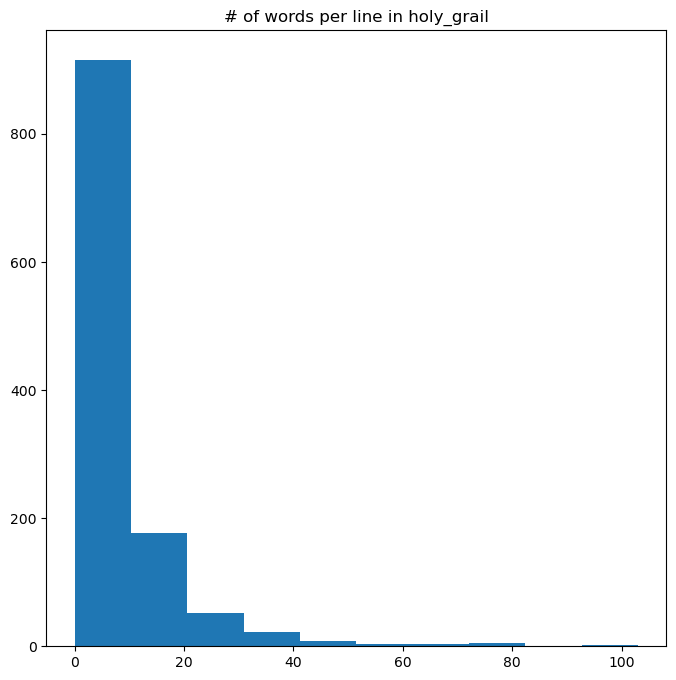

In [26]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.figure(figsize=(8,8))
plt.hist(line_num_words);
plt.title('# of words per line in holy_grail');